In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Fungsi untuk menampilkan gambar menggunakan Matplotlib
def show_image(title, image, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
# Baca gambar dalam format BGR
image_path = 'gambaruts.jpg'
image = cv2.imread(image_path)

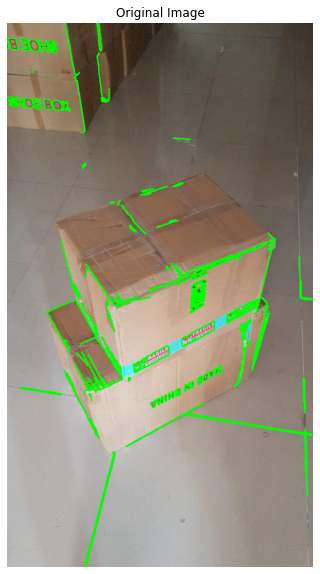

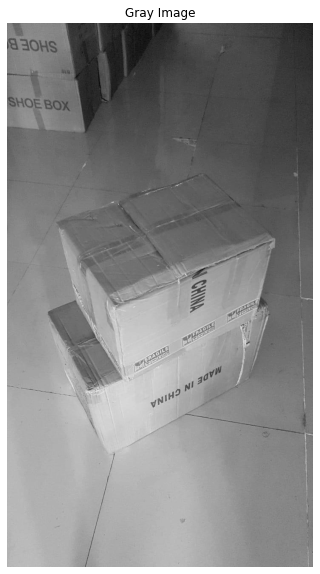

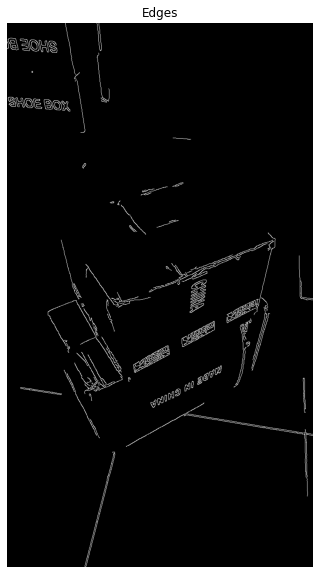

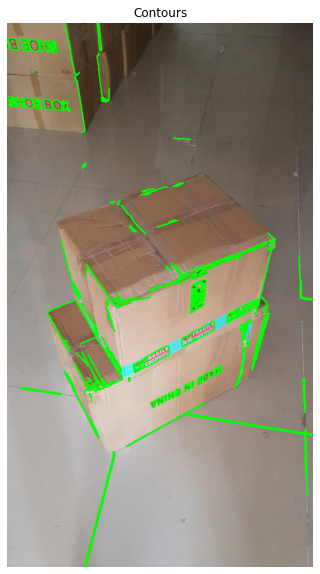

In [4]:
# Pastikan gambar terbaca
if image is None:
    print("Gambar tidak ditemukan atau tidak dapat dibaca.")
else:
    # Konversi gambar dari BGR ke RGB untuk ditampilkan dengan benar menggunakan Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Konversi gambar ke Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Mengaburkan gambar untuk mengurangi noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(blurred_image, 50, 150)

    # Temukan kontur pada gambar tepi
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Gambar kontur pada gambar asli
    cv2.drawContours(image_rgb, contours, -1, (0, 255, 0), 2)

    # Tampilkan hasil
    show_image('Original Image', image_rgb)
    show_image('Gray Image', gray_image, cmap='gray')
    show_image('Edges', edges, cmap='gray')
    show_image('Contours', image_rgb)

    # Simpan hasil gambar
    cv2.imwrite('/mnt/data/edges.jpg', edges)
    cv2.imwrite('/mnt/data/contours.jpg', cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))